### Buisness Case

Purpose: to detect a situation in which fire threatens people
Stakeholder: fire department working on early warning system and
response to fire threats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import xgboost as xgb
import sklearn
import imblearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import MyFunc as mf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from imblearn.ensemble import BalancedBaggingClassifier

In [2]:
print(f"scikit-learn version: {sklearn.__version__}")
print(f"imbalanced-learn version: {imblearn.__version__}")

scikit-learn version: 1.0.2
imbalanced-learn version: 0.7.0


In [47]:
pip install scikit-learn==1.0.2

  Using cached scikit_learn-1.0.2-cp37-cp37m-macosx_10_13_x86_64.whl (7.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [107]:
pip uninstall imbalanced-learn

Found existing installation: imbalanced-learn 0.7.0
Uninstalling imbalanced-learn-0.7.0:
  Would remove:
    /opt/anaconda3/lib/python3.7/site-packages/imbalanced_learn-0.7.0.dist-info/*
    /opt/anaconda3/lib/python3.7/site-packages/imblearn/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [106]:
pip install imbalanced-learn==0.7.0

     |████████████████████████████████| 167 kB 812 kB/s eta 0:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.3
    Uninstalling imbalanced-learn-0.12.3:
      Successfully uninstalled imbalanced-learn-0.12.3
Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


### Notebook Options


In [3]:
# Set table to show all columns
pd.set_option('display.max_columns', None)

In [4]:
cd

/Users/magdalena


### Dataset Imports

In [5]:
# Read train dataset 
df = pd.read_csv('Downloads/Fire-Incidents.csv')

### Data Check & Inspection

In [6]:
df.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24T17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24T12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09T23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01T16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08T16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

In [8]:
df.describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11181.000000,11214.000000,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.582685,43.705190,-79.403323
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.762782,0.051183,0.101086
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,1.000000,43.588926,-79.635241
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,10.000000,43.662474,-79.479273
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410


### Data Cleaning

#### Column drop

In [9]:
column_to_drop = ['Business_Impact', 'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time', 'Last_TFS_Unit_Clear_Time']

In [10]:
# Drop not needed columns
df.drop(columns=column_to_drop, inplace= True)

#### Missing Values

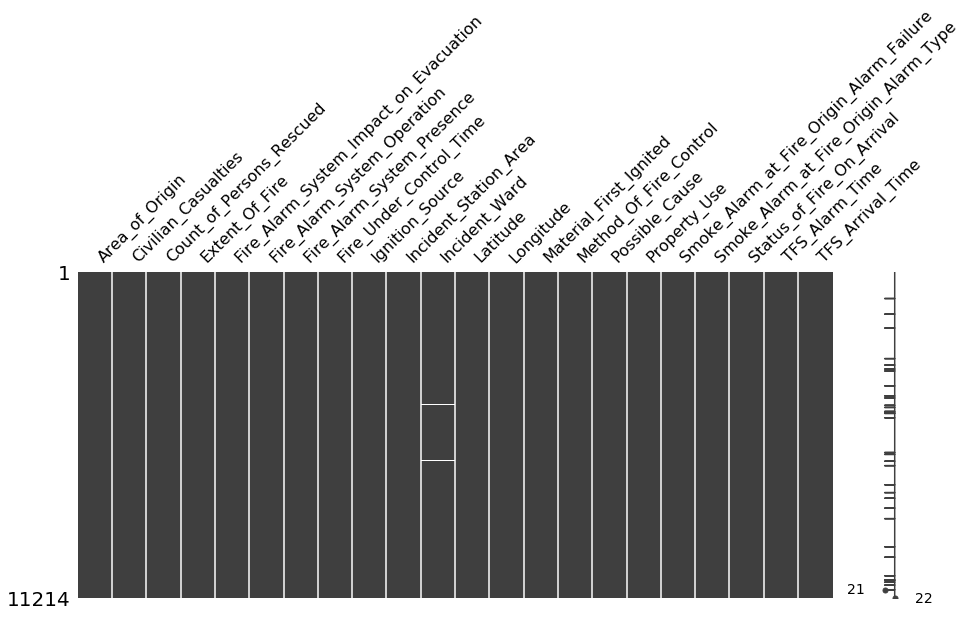

In [11]:
# Missing values on chart
ms.matrix(df, figsize= (15, 6))

In [12]:
# Number of missing values
df.isna().sum()

Area_of_Origin                               0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use                                 0
Smoke_Alarm_at_Fire_Origin_Alarm_Failure     0
Smoke_Alarm_at_Fire_Origin_Alarm_Type        0
Status_of_Fire_On_Arrival                    0
TFS_Alarm_Time                               0
TFS_Arrival_T

In [13]:
# Drop all missing values, less than 5 % of dataset
df.dropna(inplace= True)

In [14]:
# Check if drop was successfully
assert (df.isna().sum().sum() == 0), "There are still missing values !"
print('No missing values in dataset !')

No missing values in dataset !


#### Data Type Change

In [15]:
# Change to datetime
df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time'])

In [16]:
# Change to datetime
df['TFS_Arrival_Time'] = pd.to_datetime(df['TFS_Arrival_Time'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11181 entries, 0 to 11213
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            11181 non-null  object        
 1   Civilian_Casualties                       11181 non-null  int64         
 2   Count_of_Persons_Rescued                  11181 non-null  int64         
 3   Extent_Of_Fire                            11181 non-null  object        
 4   Fire_Alarm_System_Impact_on_Evacuation    11181 non-null  object        
 5   Fire_Alarm_System_Operation               11181 non-null  object        
 6   Fire_Alarm_System_Presence                11181 non-null  object        
 7   Fire_Under_Control_Time                   11181 non-null  object        
 8   Ignition_Source                           11181 non-null  object        
 9   Incident_Station_Area       

### Feature Enginering

In [18]:
# Value change in civilian_casualties
df.loc[df['Civilian_Casualties'] > 0, ['Civilian_Casualties']] = 1

In [19]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54


In [20]:
df['Civilian_Casualties'].value_counts()

0    10233
1      948
Name: Civilian_Casualties, dtype: int64

In [21]:
# Check and change Propert Use column
prop_list = df['Property_Use'].value_counts()

In [22]:
# Create new columns with business or non business value
df['Property_Use_Cat'] = df['Property_Use'].apply(mf.classify_row)

In [23]:
# Create columns with minues between TFS_Arrival_Time - TFS_Alarm_Time
df['Response_Time'] = (df['TFS_Arrival_Time'] - df['TFS_Alarm_Time']) / pd.Timedelta(minutes= 1)

In [24]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Property_Use_Cat,Response_Time
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,Business,4.550000
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,Non-Business,5.183333
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,Business,3.700000
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,Non-Business,2.950000
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,Business,5.066667


#### Encoding

In [25]:
# Label Encoding
lab_encoder = LabelEncoder()

In [26]:
# New Function
def encode_labels(list) :
    """ Function that encode columns to label

    Args: 
        list -> type List, columns that need to be encoded
    return dataframe
    """
    for col in list:
        df[col] = lab_encoder.fit_transform(df[col])
    return df

In [27]:
columns_to_lab_encode = ['Area_of_Origin', 'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation', 'Ignition_Source', 'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause', 'Status_of_Fire_On_Arrival']

In [28]:
encode_labels(columns_to_lab_encode)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Property_Use_Cat,Response_Time
0,51,0,86,0,4,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,75,114,18.0,43.760357,-79.412479,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),3,2018-08-24 16:49:36,2018-08-24 16:54:09,Business,4.550000
1,11,0,28,1,4,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,48,142,7.0,43.754542,-79.530419,41,3,18,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,1,2018-11-24 07:09:12,2018-11-24 07:14:23,Non-Business,5.183333
2,31,1,16,8,5,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,75,325,27.0,43.657300,-79.373460,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),5,2017-02-09 17:45:07,2017-02-09 17:48:49,Business,3.700000
3,70,0,12,3,6,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,75,332,20.0,43.649350,-79.393700,49,2,19,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,4,2012-10-30 00:42:01,2012-10-30 00:44:58,Non-Business,2.950000
4,62,1,11,8,5,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,40,442,5.0,43.697960,-79.511539,4,2,14,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,2,2018-07-08 04:08:50,2018-07-08 04:13:54,Business,5.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11209,66,0,0,0,0,Fire alarm system operated,Fire alarm system present,2018-02-23T14:50:16,75,313,13.0,43.667295,-79.373778,45,1,6,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),2,2018-02-23 14:35:03,2018-02-23 14:38:33,Business,3.500000
11210,45,0,0,0,0,Fire alarm system operated,Fire alarm system present,2018-02-24T02:04:10,12,222,20.0,43.729364,-79.280725,49,3,2,General Business Office,Not applicable: Alarm operated OR presence/ope...,Interconnected,1,2018-02-24 01:30:45,2018-02-24 01:36:59,Non-Business,6.233333
11211,45,0,0,0,0,Fire alarm system operated,Fire alarm system present,2018-02-24T02:40:00,10,222,20.0,43.729364,-79.280725,14,3,10,General Business Office,Not applicable: Alarm operated OR presence/ope...,Interconnected,1,2018-02-24 02:30:33,2018-02-24 02:35:07,Non-Business,4.566667
11212,51,1,0,1,0,Fire alarm system operated,Fire alarm system present,2018-02-24T00:48:11,65,141,7.0,43.763361,-79.500863,40,2,6,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Battery operated,5,2018-02-24 00:34:12,2018-02-24 00:38:47,Business,4.583333


In [29]:
df['Fire_Alarm_System_Operation'].value_counts()

Fire alarm system operated                  4513
Not applicable (no system)                  3858
Fire alarm system operation undetermined    1417
Fire alarm system did not operate           1393
Name: Fire_Alarm_System_Operation, dtype: int64

In [30]:
df['Fire_Alarm_System_Presence'].value_counts()

Fire alarm system present                                                 6208
Not applicable (bldg not classified by OBC OR detached/semi/town home)    1935
No Fire alarm system                                                      1788
Undetermined                                                              1250
Name: Fire_Alarm_System_Presence, dtype: int64

In [31]:
# One Hot Encode on chosen columns
df = pd.get_dummies(df, columns= ['Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence', 'Property_Use_Cat'])

In [32]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Response_Time,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Property_Use_Cat_Business,Property_Use_Cat_Non-Business
0,51,0,86,0,4,2018-08-24T17:06:28,75,114,18.0,43.760357,-79.412479,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),3,2018-08-24 16:49:36,2018-08-24 16:54:09,4.550000,1,0,0,0,1,0,0,0,1,0
1,11,0,28,1,4,2018-11-24T07:19:00,48,142,7.0,43.754542,-79.530419,41,3,18,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,1,2018-11-24 07:09:12,2018-11-24 07:14:23,5.183333,0,1,0,0,1,0,0,0,0,1
2,31,1,16,8,5,2017-02-09T18:36:21,75,325,27.0,43.657300,-79.373460,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),5,2017-02-09 17:45:07,2017-02-09 17:48:49,3.700000,0,1,0,0,1,0,0,0,1,0
3,70,0,12,3,6,2012-10-30T01:28:48,75,332,20.0,43.649350,-79.393700,49,2,19,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,4,2012-10-30 00:42:01,2012-10-30 00:44:58,2.950000,0,0,1,0,0,0,0,1,0,1
4,62,1,11,8,5,2018-07-08T04:38:28,40,442,5.0,43.697960,-79.511539,4,2,14,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,2,2018-07-08 04:08:50,2018-07-08 04:13:54,5.066667,0,1,0,0,1,0,0,0,1,0


### Model Preparation

In [33]:
# Copy of dataset
df_mode = df.copy()

In [34]:
# Save new dataset to csv
df_mode.to_csv('/Users/magdalena/Downloads/df_mode.csv')

In [35]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Response_Time,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Property_Use_Cat_Business,Property_Use_Cat_Non-Business
0,51,0,86,0,4,2018-08-24T17:06:28,75,114,18.0,43.760357,-79.412479,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),3,2018-08-24 16:49:36,2018-08-24 16:54:09,4.550000,1,0,0,0,1,0,0,0,1,0
1,11,0,28,1,4,2018-11-24T07:19:00,48,142,7.0,43.754542,-79.530419,41,3,18,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,1,2018-11-24 07:09:12,2018-11-24 07:14:23,5.183333,0,1,0,0,1,0,0,0,0,1
2,31,1,16,8,5,2017-02-09T18:36:21,75,325,27.0,43.657300,-79.373460,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),5,2017-02-09 17:45:07,2017-02-09 17:48:49,3.700000,0,1,0,0,1,0,0,0,1,0
3,70,0,12,3,6,2012-10-30T01:28:48,75,332,20.0,43.649350,-79.393700,49,2,19,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,4,2012-10-30 00:42:01,2012-10-30 00:44:58,2.950000,0,0,1,0,0,0,0,1,0,1
4,62,1,11,8,5,2018-07-08T04:38:28,40,442,5.0,43.697960,-79.511539,4,2,14,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,2,2018-07-08 04:08:50,2018-07-08 04:13:54,5.066667,0,1,0,0,1,0,0,0,1,0


In [36]:
new_set_col_drop = ['Fire_Under_Control_Time', 'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'TFS_Alarm_Time', 'TFS_Arrival_Time']

In [37]:
# Drop non needed columns for model
df_mode.drop(columns= new_set_col_drop, inplace= True)

In [38]:
df_mode.sample(10)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Status_of_Fire_On_Arrival,Response_Time,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Property_Use_Cat_Business,Property_Use_Cat_Non-Business
3020,5,0,0,0,4,81,342,17.0,43.68693,-79.45280,11,2,13,5,4.966667,0,0,0,1,0,0,1,0,1,0
8267,31,0,0,9,5,75,223,36.0,43.74249,-79.22211,49,2,19,3,6.300000,0,1,0,0,1,0,0,0,1,0
8595,72,0,0,0,6,1,146,7.0,43.72489,-79.50961,22,2,1,3,7.100000,1,0,0,0,1,0,0,0,1,0
5642,62,0,0,1,4,12,221,38.0,43.74479,-79.24472,52,3,2,1,5.600000,0,0,1,0,1,0,0,0,1,0
314,62,1,1,1,5,75,313,28.0,43.66966,-79.37579,49,2,20,2,3.400000,0,1,0,0,1,0,0,0,1,0
9309,11,1,0,1,6,69,223,36.0,43.74318,-79.21891,31,2,20,2,5.266667,0,1,0,0,1,0,0,0,1,0
7428,56,0,0,0,4,69,114,23.0,43.78707,-79.41735,11,2,13,5,5.883333,1,0,0,0,1,0,0,0,0,1
987,66,0,0,0,0,75,423,4.0,43.65783,-79.46394,45,2,19,2,5.300000,0,1,0,0,1,0,0,0,1,0
3372,11,0,0,0,3,57,111,24.0,43.79375,-79.41503,41,4,5,1,3.883333,0,0,0,1,0,0,1,0,1,0
8696,11,0,0,8,4,1,443,4.0,43.68176,-79.53894,22,2,9,5,4.600000,0,0,0,1,0,1,0,0,1,0


### Base Model

#### Train and Test Split

In [39]:
# Split Data for X and y
X = df_mode.drop(columns= 'Civilian_Casualties')
y = df_mode['Civilian_Casualties'].values.ravel()

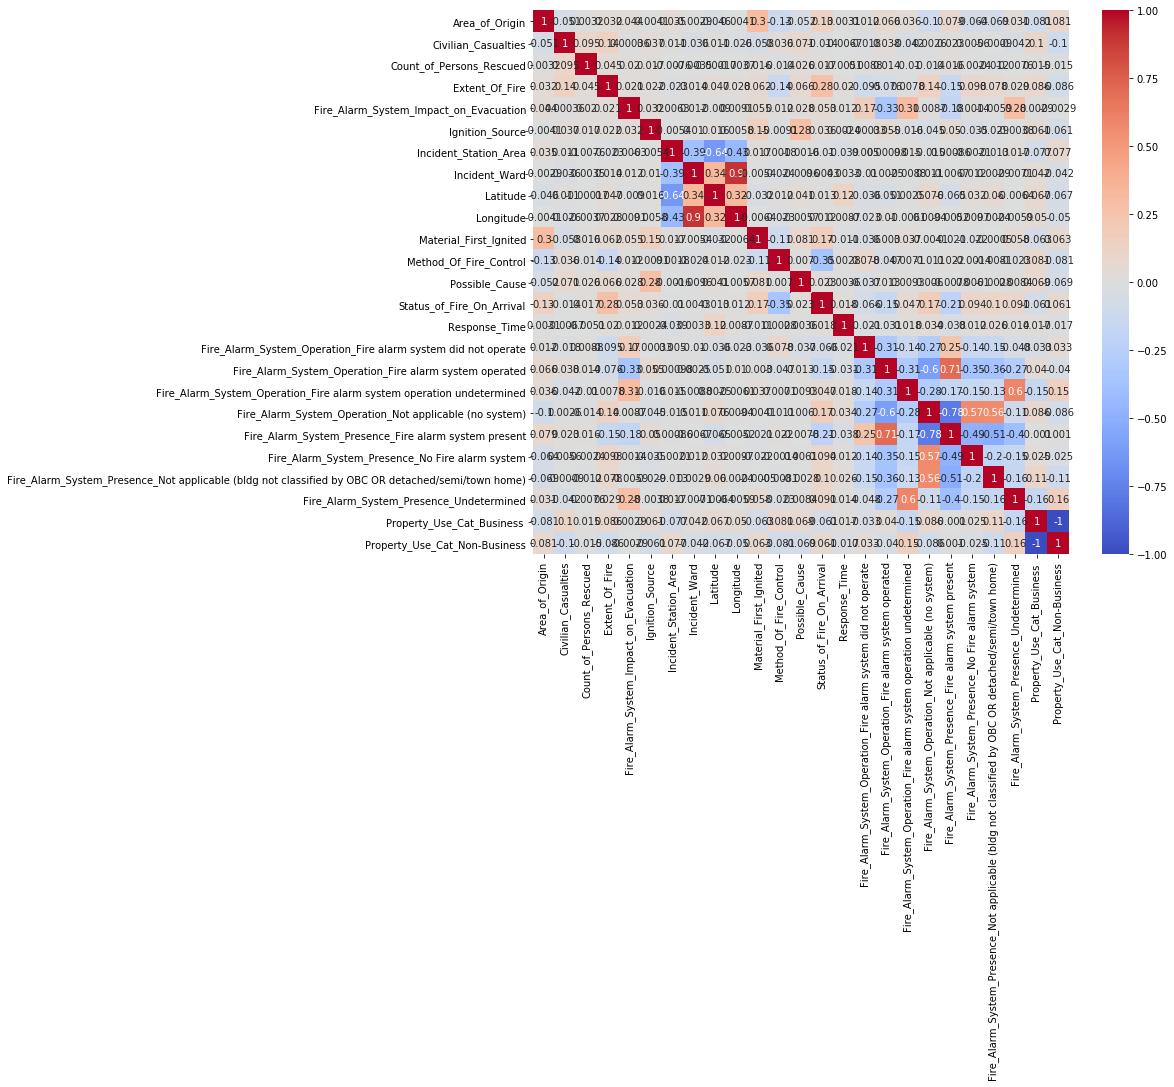

In [66]:
correlation_matrix = df_mode.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.show()

In [40]:
df.corr(method='spearman')['Civilian_Casualties']

Area_of_Origin                                                                                      -0.052026
Civilian_Casualties                                                                                  1.000000
Count_of_Persons_Rescued                                                                             0.350539
Extent_Of_Fire                                                                                       0.138716
Fire_Alarm_System_Impact_on_Evacuation                                                               0.009016
Ignition_Source                                                                                      0.028945
Incident_Station_Area                                                                                0.012727
Incident_Ward                                                                                       -0.037770
Latitude                                                                                             0.017061
Longitude 

In [41]:
# Preparation of test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [42]:
# Model
log_reg = LogisticRegression(random_state= 42)

In [43]:
# Fit train data
log_reg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [44]:
# Prediction with test data
y_pred = log_reg.predict(X_test)

#### Confusion Matrix

In [45]:
# Confision matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

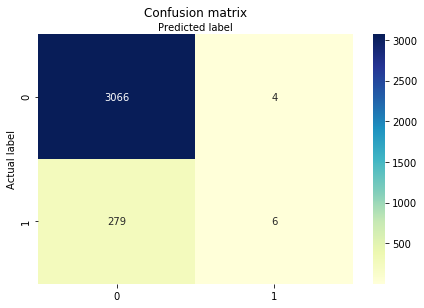

In [46]:
# Heatmap to show confision matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Evaluation Metrics

In [47]:
# Report with classification metrics
target_names = ['No casulties', 'Casulties']
report = classification_report(y_test, y_pred, target_names = target_names, output_dict=True)
df_result = pd.DataFrame(report).transpose()

In [48]:
df_result

,precision,recall,f1-score,support
No casulties,0.916592,0.998697,0.955885,3070.000000
Casulties,0.600000,0.021053,0.040678,285.000000
accuracy,0.915648,0.915648,0.915648,0.915648
macro avg,0.758296,0.509875,0.498281,3355.000000
weighted avg,0.889698,0.915648,0.878140,3355.000000


#### ROC Curve

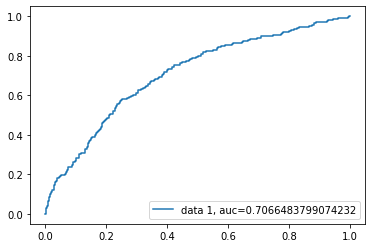

In [49]:
# Receiver Operating Characteristic on chart
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### RF

In [50]:
# Model
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rfcb = BalancedBaggingClassifier(base_estimator=rfc, sampling_strategy='auto', replacement=False, random_state=42)

In [53]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

In [54]:
accuracy_rfc

0.9222056631892698

In [55]:
target_names = ['No casulties', 'Casulties']
report = classification_report(y_test, y_pred_rfc, target_names = target_names, output_dict=True)
df_result_rfc = pd.DataFrame(report).transpose()

In [56]:
df_result_rfc

,precision,recall,f1-score,support
No casulties,0.928332,0.991531,0.958891,3070.000000
Casulties,0.657895,0.175439,0.277008,285.000000
accuracy,0.922206,0.922206,0.922206,0.922206
macro avg,0.793113,0.583485,0.617950,3355.000000
weighted avg,0.905359,0.922206,0.900967,3355.000000


In [57]:
# Confision matrix
cnf_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)

Text(0.5, 257.44, 'Predicted label')

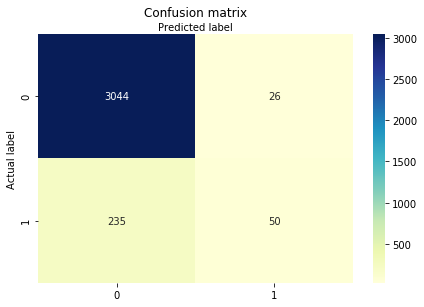

In [58]:
# Heatmap to show confision matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_rfc), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0, 0.5, 'True Positive Rate')

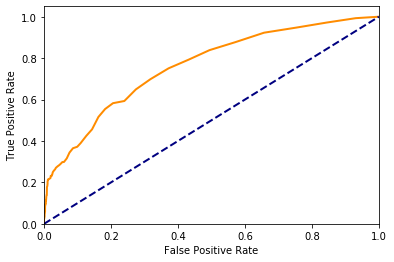

In [59]:
# Predict probabilities
y_probs = rfc.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [75]:
## from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 25, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200, 225, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 8, 12, 16, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [78]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   8.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   4.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   3.8s
[CV] END bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=225; total time=   2.4s
[CV] END bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=225; total time=   2.5s
[CV] END bootstrap=True, max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=225; total time=   6.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimator

[CV] END bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   4.3s
[CV] END bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   2.4s
[CV] END bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.6s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125; total time=   3.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125; total time=   2.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125; total time=   2.2s
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   4.3s
[CV] END bootstrap=False, max_depth=12, max_fea

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.4s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   4.1s
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   4.1s
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   4.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   2.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, ma

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 8, 12, 16, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100, 125,
                                                         150, 175, 200, 225,
                                                         250]},
                   random_state=42, verbose=2)

In [80]:
rfc_random.best_params_

{'n_estimators': 175,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [82]:
y_pred_rfc_random = rfc_random.predict(X_test)
target_names = ['No casulties', 'Casulties']
report = classification_report(y_test, y_pred_rfc_random, target_names = target_names, output_dict=True)
df_result_rfc_random = pd.DataFrame(report).transpose()
df_result_rfc_random

,precision,recall,f1-score,support
No casulties,0.928659,0.992182,0.959370,3070.0000
Casulties,0.680000,0.178947,0.283333,285.0000
accuracy,0.923100,0.923100,0.923100,0.9231
macro avg,0.804329,0.585565,0.621352,3355.0000
weighted avg,0.907536,0.923100,0.901942,3355.0000


Text(0.5, 257.44, 'Predicted label')

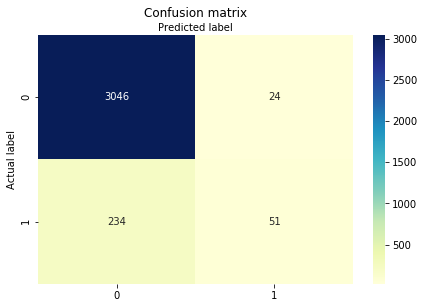

In [83]:
# Confision matrix
cnf_matrix_rfc_random = metrics.confusion_matrix(y_test, y_pred_rfc_random)
# Heatmap to show confision matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_rfc_random), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0, 0.5, 'True Positive Rate')

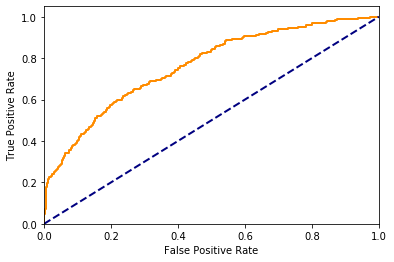

In [85]:
# Predict probabilities
y_probs_rfc_random = rfc_random.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rfc_random)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_probs_rfc_random)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [88]:
importances = rfc_random.best_estimator_.feature_importances_
importances

array([0.05275676, 0.1801689 , 0.05355313, 0.03159364, 0.04428732,
       0.06708682, 0.06057088, 0.09121218, 0.09523805, 0.06390863,
       0.0222609 , 0.04889514, 0.02917142, 0.08983554, 0.00824463,
       0.00837899, 0.00561204, 0.00612923, 0.00799098, 0.00797755,
       0.00641601, 0.00420644, 0.00697265, 0.00753217])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]


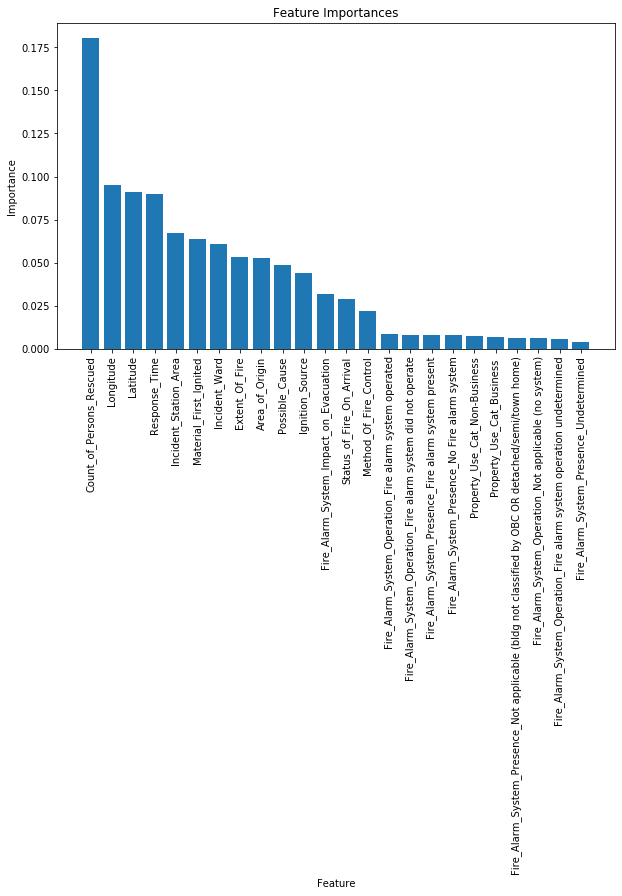

In [91]:
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### XGBOOST

In [60]:
# Model
xgc = xgb.XGBClassifier(learning_rate = 0.05, gamma = 0,
                        objective='reg:logistic', max_depth=10)
xgc.fit(X_train,y_train)
pass


y_pred_xgc = xgc.predict(X_test)
accuracy_xgc = accuracy_score(y_test, y_pred_xgc)

In [61]:
accuracy_xgc

0.9201192250372578

In [62]:
target_names = ['No casulties', 'Casulties']
report = classification_report(y_test, y_pred_xgc, target_names = target_names, output_dict=True)
df_result_xgc = pd.DataFrame(report).transpose()
df_result_xgc

,precision,recall,f1-score,support
No casulties,0.927134,0.990554,0.957795,3070.000000
Casulties,0.613333,0.161404,0.255556,285.000000
accuracy,0.920119,0.920119,0.920119,0.920119
macro avg,0.770234,0.575979,0.606675,3355.000000
weighted avg,0.900477,0.920119,0.898142,3355.000000


In [63]:
# Confision matrix
cnf_matrix_xgc = metrics.confusion_matrix(y_test, y_pred_xgc)

Text(0.5, 257.44, 'Predicted label')

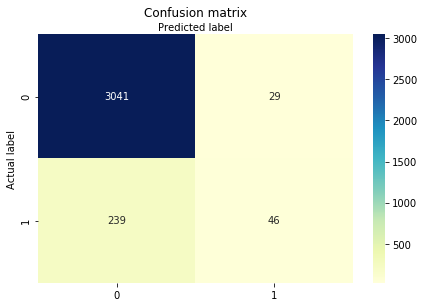

In [64]:
# Heatmap to show confision matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_xgc), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0, 0.5, 'True Positive Rate')

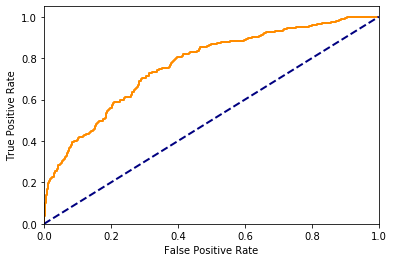

In [67]:
# Predict probabilities
y_probs_xgc = xgc.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgc)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_probs_xgc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')